In [2]:
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
project_path = "/content/drive/My Drive/Capstone_Project/Ticket_Assignment/input_data.xlsx"

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns     

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
pip install wordcloud

In [0]:
from wordcloud import WordCloud

In [7]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
stops = set(stopwords.words("english"))
stops.remove("not")

In [0]:
data = pd.read_excel(project_path)

In [10]:
data.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
data = data.rename(columns={"Short description":"srt_desc","Description":"desc","Caller":"caller","Assignment group":"group"})

In [12]:
data.head()

,srt_desc,desc,caller,group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
def word_cloud(data):
  comment_words = '' 
  for val in data: 
        
      val = str(val) 
    
      tokens = val.split() 
        
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
        
      comment_words += " ".join(tokens)+" "

  
  wordcloud_srt_desc = WordCloud(width = 800, height = 800, 
                  stopwords = stops, 
                  min_font_size = 10).generate(comment_words) 
                            
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud_srt_desc) 
  plt.axis("off") 
  plt.margins(x=0,y=0)
  plt.tight_layout(pad = 0) 
    
  plt.show() 

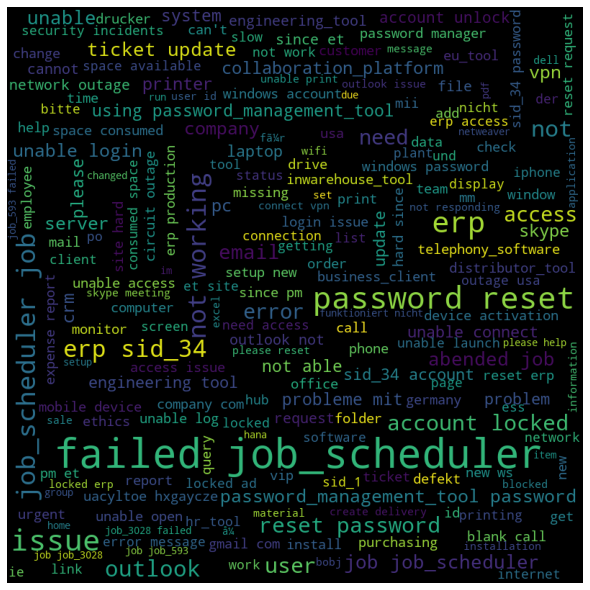

In [14]:
word_cloud(data.srt_desc)

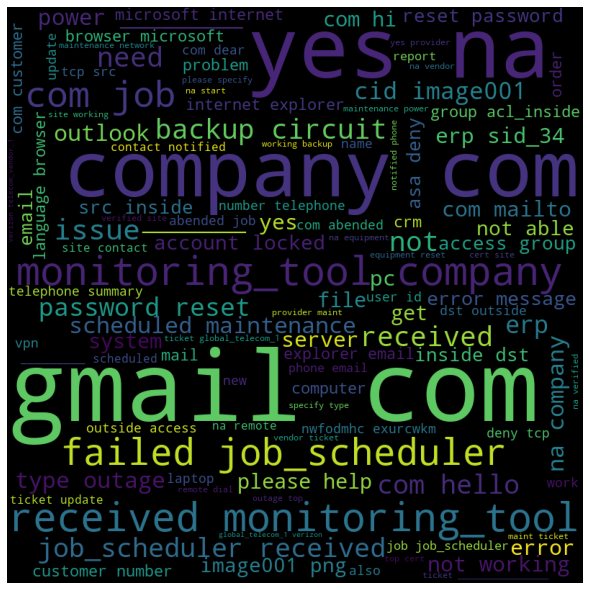

In [15]:
word_cloud(data.desc)

In [16]:
data.desc[0]

'-verified user details.(employee# & manager name)\n-checked the user name in ad and reset the password.\n-advised the user to login and check.\n-caller confirmed that he was able to login.\n-issue resolved.'

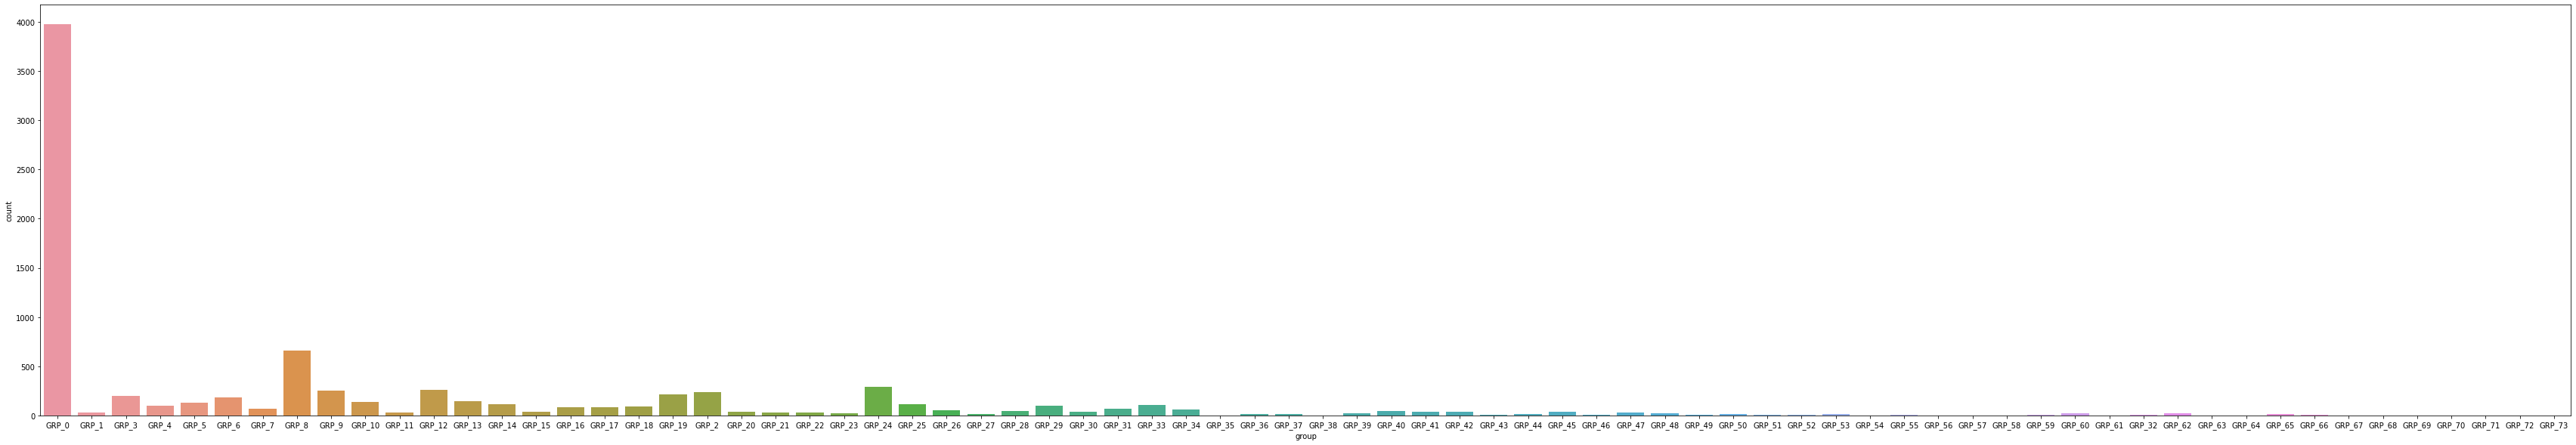

In [17]:
plt.figure(figsize=(60,10))
sns.countplot(data.group)
plt.show()

In [18]:
data.group.value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_73       1
GRP_61       1
GRP_35       1
GRP_67       1
GRP_64       1
Name: group, Length: 74, dtype: int64

In [19]:
data.describe()

,srt_desc,desc,caller,group
count,8492,8499,8500,8500
unique,7481,7814,2950,74
top,password reset,the,bpctwhsn kzqsbmtp,GRP_0
freq,38,56,810,3976


In [20]:
data.isnull().sum()

srt_desc    8
desc        1
caller      0
group       0
dtype: int64

In [0]:
def fillna():
  for i in data.index:
    if pd.isna(data.iloc[i,0]) and pd.isna(data.iloc[i,1]):
      data.drop(data.index[i])
    elif pd.isna(data.iloc[i,0]):
      data.iloc[i,0] = data.iloc[i,1]
    elif pd.isna(data.iloc[i,1]):
      data.iloc[i,1] = data.iloc[i,0]

In [0]:
fillna()

In [23]:
data.isnull().sum()

srt_desc    0
desc        0
caller      0
group       0
dtype: int64

In [24]:
data.head()

,srt_desc,desc,caller,group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\n\nreceived from: hmjdrvpb.komuaywn@gmail.com...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\n\nreceived from: eylqgodm.ybqkwiam@gmail.com...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [0]:
  import re

In [0]:
data_final_re = data.copy()

In [27]:
non_alnum = []
for col1 in data_final_re.index:
  for w in data_final_re["desc"][col1]:
    if not w.isalnum():
      if w not in non_alnum:
        non_alnum.append(w)
        #print(str(w))
print(non_alnum)        

['-', ' ', '.', '(', '#', '&', ')', '\n', ':', '@', ',', '/', '?', '_', '[', "'", ']', '*', '<', '!', '"', '>', '=', ';', '$', '\\', '%', '€', '¦', '˜', '+', '„', '…', '‚', '°', '†', '’', '¤', '›', '®', '»', '¶', '¬', '¯', '\x81', '‡', '¥', '”', '¿', '¨', '¸', '\xad', '\x8f', '\x90', '«', '•', '‹', '¡', '‰', '\x9d', '¢', '™', '–', '\xa0', '‘', '\x8d', '·', '´', '±', '~', '“', '©', '|', '§', '—', '£', '`', '{', '}', '^']


In [0]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aint": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"arent": "are not / am not",
"can't": "cannot",
"cant": "cannot",
"can't've": "cannot have",
"cant've": "cannot have",
"cantve": "cannot have",
"'cause": "because",
"could've": "could have",
"couldve": "could have",
"couldn't": "could not",
"couldnt": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"didnt": "did not",
"doesn't": "does not",
"doesnt": "does not",
"don't": "do not",
"dont": "do not",
"hadn't": "had not",
"hadnt": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"hasnt": "has not",
"haven't": "have not",
"havent": "have not",
"he'd": "he had / he would",
"hed": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"Im": "I am",
"I've": "I have",
"Ive": "I have",
"isn't": "is not",
"isnt": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"whats": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"wheres": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"whos": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"whys": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"wont": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldnt": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}

In [0]:
def clean_data(text,remove_stopwords = True):
  text1 = text.lower()
  text1 = text1.split()
  new_text=[]
  for w in text1:
    if w in contractions:
      new_text.append(contractions[w])
    else:
      new_text.append(w)
    text1 = " ".join(new_text)
    text1 = re.sub(r'[´`^]', '', text1, flags=re.MULTILINE)
    text1 = re.sub(r'[_]', ' ', text1)
    text1 = re.sub(r'[\\]', '', text1)
    text1 = re.sub(r'[][]', ' ', text1)
    text1 = re.sub(r'[^a-zA-Z0-9]', ' ', text1)    
    if remove_stopwords:  
      text1 = text1.split()
      text1 = [w for w in text1 if not w in stops]
      text1 = " ".join(text1)
  if len(text1) > 0:
    text1 = re.sub(r' +', ' ', text1)
  return text1

In [0]:
def combine_desc(srt_desc_text,desc_text,caller_text):
  whole_desc = ""
  srt_desc = clean_data(srt_desc_text,True)
  desc = clean_data(desc_text,True)
  call_text = clean_data(caller_text,True)
  if srt_desc == desc:
    whole_desc = (" ".join((str(desc),str(call_text))))
  elif str(srt_desc) in str(desc):
    whole_desc = (" ".join((str(srt_desc), str(desc.replace(srt_desc,'')),str(call_text))))
  else:
    whole_desc = (" ".join((str(srt_desc), str(desc),str(call_text))))
  return whole_desc

In [0]:
complete_desc = []
for i in data_final_re.index:
  complete_desc.append(combine_desc(data_final_re.srt_desc[i],data_final_re.desc[i],data_final_re.caller[i]))

In [32]:
print(len(complete_desc))
complete_desc[:10]

8500


['login issue verified user details employee manager name checked user name ad reset password advised user login check caller confirmed able  resolved spxjnwir pjlcoqds',
 'outlook received hmjdrvpb komuaywn gmail com hello team meetings skype meetings etc not appearing  calendar somebody please advise correct kind hmjdrvpb komuaywn',
 'cannot log vpn received eylqgodm ybqkwiam gmail com hi  best eylqgodm ybqkwiam',
 'unable access hr tool page xbkucsvz gcpydteq',
 'skype error owlgqjme qhcozdfx',
 'unable log engineering tool skype eflahbxn ltdgrvkz',
 'event critical hostname 221 company com value mountpoint threshold oracle sid 37 erpdata21  sr3psa1d 7 sr3psa1d data7 perpsr3psa1d 4524 98 jyoqwxhz clhxsoqy',
 'ticket no1550391 employment status new non employee enter user name eqzibjhw ymebpoih',
 'unable disable add ins outlook mdbegvct dbvichlg',
 'ticket update inplant 874773 fumkcsji sarmtlhy']

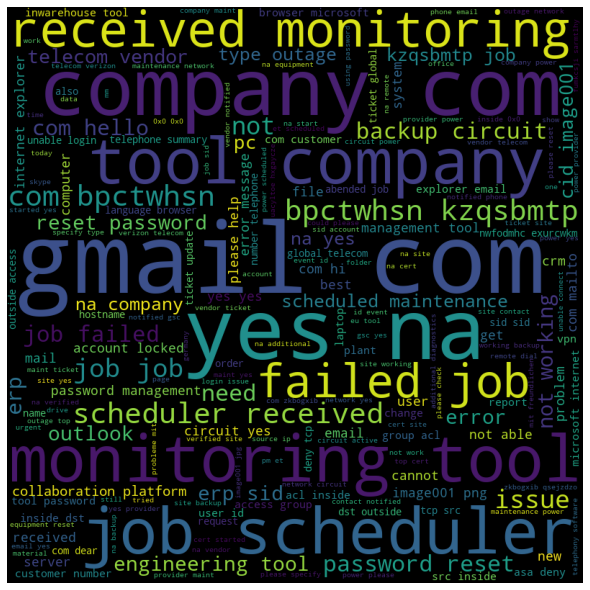

In [33]:
word_cloud(complete_desc)

In [0]:
def find_word(word):
  matched_list = []
  for text in complete_desc:
    match_text = re.findall(r'([^.]*'+word+'[^.]*)',text)
    if len(match_text) > 0:
      matched_list.append(match_text)
  return matched_list                                                                                                                   

In [35]:
matched = find_word(' erp ') 
print(len(matched))
matched

776


[['unable log erp sid 34 hvskpglx bpsfxmon'],
 ['duplication network address received kxsceyzo naokumlb gmail com gentles two devices trying share ip address trying share 96 26 27 9619 one printer hostname prtjc0074 new display erp display using dhcp get address assigned printer hard coded guess address 96 26 27 9619 not get set static address dhcp need corrected display pick another address kxsceyzo naokumlb'],
 ['password changed password management tool not update erp account lduqxywt wcydjgvl'],
 ['error login sid 34 system  verified user details employee manager name user tried password management tool pwd manager unlocked erp id caller confirmed able login issue resolved quxtnlgd tqnjyzsm'],
 ['engineering tool drawing originals pdf format not shown hello service need monitor manufacturing drawings approve manufacturing engineering tool stopped showing pdf originals process erp production order interface vendor bas cr 167 rfc destination production order interface vendor views 01

In [36]:
matched = find_word(' na ') 
print(len(matched))
matched

216


[['job hr payroll na u1 failed job scheduler 10 30 2016 23 00 00 received monitoring tool company com  bpctwhsn kzqsbmtp'],
 ['job hr payroll na u2 failed job scheduler 10 30 2016 23 00 00 received monitoring tool company com  bpctwhsn kzqsbmtp'],
 ['job hr payroll na u6 failed job scheduler 10 30 2016 23 00 00 received monitoring tool company com  bpctwhsn kzqsbmtp'],
 ['power outage uk al 1st 5th ave sites hard since 4 31 pm et 10 30 type outage network circuit x power please specify type outage 1 top 23 cert site yes yes na 2 start 4 31 pm et 10 30 3 scheduled maintenance power yno yes na company power provider power 4 scheduled maintenance network yes na company maint yes provider maint ticket 5 site backup circuit yes yes na 6 backup circuit active na yes na 7 site contact notified phone email yes na 8 remote dial na yes na 9 equipment reset na yes na 10 verified site working backup circuit na yes na 11 vendor ticket global telecom 1 verizon telecom vendor 1 telecom vendor 2 globa

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [0]:
label = LabelEncoder()
y = label.fit_transform(data_final_re.group)
y_fit = label.fit(data_final_re.group)

In [39]:
y_fit.classes_

array(['GRP_0', 'GRP_1', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_3', 'GRP_30',
       'GRP_31', 'GRP_32', 'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36',
       'GRP_37', 'GRP_38', 'GRP_39', 'GRP_4', 'GRP_40', 'GRP_41',
       'GRP_42', 'GRP_43', 'GRP_44', 'GRP_45', 'GRP_46', 'GRP_47',
       'GRP_48', 'GRP_49', 'GRP_5', 'GRP_50', 'GRP_51', 'GRP_52',
       'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56', 'GRP_57', 'GRP_58',
       'GRP_59', 'GRP_6', 'GRP_60', 'GRP_61', 'GRP_62', 'GRP_63',
       'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67', 'GRP_68', 'GRP_69',
       'GRP_7', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73', 'GRP_8', 'GRP_9'],
      dtype=object)

In [0]:
onehot_encoder = OneHotEncoder(sparse=False)
y_reshaped = y.reshape(len(y), 1)
y_encoded = onehot_encoder.fit_transform(y_reshaped)

In [41]:
print("Features Data:")
print(complete_desc[43])
print("Group no : ",data_final_re.group[43])
print("Label Data:")
print(y_encoded[43])

Features Data:
please reroute jobs printer01 printer02 issue needs resolved today received yisohglr uvteflgb gmail com hi printer01 printer not working needs part replaced reroute jobs queue printer printer02 wihuyjdo qpogfwkb indicated prqos001 needs new part may not deliver days inwarehouse tools need print printer02 needs taken care today since inwarehouse tools printed picked outside vendor 2 30 pm usa daily basis please contact dkmcfreg anwmfvlgenkataramdntyana questions jobs queue today yisohglr uvteflgb
Group no :  GRP_5
Label Data:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


In [0]:
no_of_groups = data_final_re["group"].nunique()

In [0]:
max_len = max([len(str(r).split()) for r in complete_desc])

In [44]:
max_len

2022

In [0]:
no_words = []
for val in complete_desc:
  no_words.append(len(str(val).split()))

In [0]:
max_features = 20000
max_len = 2000

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split,cross_validate

In [0]:
tokenizer = Tokenizer(num_words=max_features)

tokenizer.fit_on_texts(complete_desc)

seq = tokenizer.texts_to_sequences(complete_desc)

In [0]:
X = pad_sequences(seq, maxlen = max_len)

In [50]:
print(complete_desc[43])
print(X[43])

please reroute jobs printer01 printer02 issue needs resolved today received yisohglr uvteflgb gmail com hi printer01 printer not working needs part replaced reroute jobs queue printer printer02 wihuyjdo qpogfwkb indicated prqos001 needs new part may not deliver days inwarehouse tools need print printer02 needs taken care today since inwarehouse tools printed picked outside vendor 2 30 pm usa daily basis please contact dkmcfreg anwmfvlgenkataramdntyana questions jobs queue today yisohglr uvteflgb
[   0    0    0 ...  304 5143 5144]


In [51]:
print(tokenizer.word_index)

{'com': 1, 'not': 2, 'company': 3, 'job': 4, 'received': 5, 'tool': 6, 'gmail': 7, 'please': 8, 'yes': 9, 'na': 10, 'password': 11, 'erp': 12, '1': 13, '2016': 14, 'user': 15, '00': 16, 'access': 17, '10': 18, 'reset': 19, 'issue': 20, 'sid': 21, 'ticket': 22, 'monitoring': 23, 'scheduler': 24, 'unable': 25, 'failed': 26, 'error': 27, '2': 28, 'email': 29, 'bpctwhsn': 30, 'kzqsbmtp': 31, 'account': 32, 'site': 33, 'hostname': 34, 'help': 35, '08': 36, 'circuit': 37, 'name': 38, 'working': 39, '09': 40, 'system': 41, 'power': 42, 'outlook': 43, 'id': 44, 'network': 45, 'hello': 46, '16': 47, 'need': 48, 'login': 49, '4': 50, 'vendor': 51, '34': 52, 'cannot': 53, 'backup': 54, '0': 55, 'cid': 56, 'telecom': 57, 'message': 58, 'event': 59, '3': 60, 'outage': 61, 'server': 62, 'phone': 63, 'new': 64, 'see': 65, 'type': 66, '23': 67, 'able': 68, '11': 69, 'inside': 70, 'usa': 71, '13': 72, 'hi': 73, 'team': 74, 'vpn': 75, '5': 76, '12': 77, 'crm': 78, 'engineering': 79, '8': 80, 'number': 8

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y_encoded,test_size=0.3,random_state=1)

In [53]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of X_train :  (5950, 2000)
Shape of X_test :  (2550, 2000)
Shape of y_train :  (5950, 74)
Shape of y_test :  (2550, 74)


In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [0]:
#y_pred = knn.predict(X_test)
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.47714285714285715
0.4250980392156863


In [55]:
dTree = DecisionTreeClassifier(criterion = 'entropy', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [56]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

0.9969747899159664
0.46509803921568627


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rfTree = RandomForestClassifier(n_estimators=100)
rfTree.fit(X_train,y_train)
print("rfTree on train data ", rfTree.score(X_train,y_train))
print("rfTree on train data ", rfTree.score(X_test,y_test))

rfTree on train data  0.9963025210084033
rfTree on train data  0.42980392156862746
